In [1]:
import calour as ca
import calour_utils as cu
import matplotlib.pyplot as plt

failed to load logging config file


In [2]:
ca.set_log_level(11)
%matplotlib inline

In [3]:
# use the amnon calour config file
import os
os.environ['CALOUR_CONFIG_FILE']='/Users/amnon/git/calour/calour/calour.config.amnon'

In [4]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the dataset:
Reduced diversity and altered composition of the gut microbiome in individuals with myalgic encephalomyelitis/chronic fatigue syndrome

Giloteaux, L., Goodrich, J. K., Walters, W. A., Levine, S. M., Ley, R. E., & Hanson, M. R. (2016)

Microbiome, 4(1), 1-12


In [5]:
dat=ca.read_amplicon('./all.biom','./map.joined.txt',normalize=10000,min_reads=1000)

2022-06-19 14:01:44 INFO loaded 87 samples, 2129 features
2022-06-19 14:01:44 WARNING These have metadata but do not have data - dropped (1): {'ERR1331814'}
2022-06-19 14:01:44 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-19 14:01:44 INFO After filtering, 87 remain.


In [6]:
datc=dat.cluster_features(10)

2022-06-19 14:01:44 INFO After filtering, 1100 remain.


In [7]:
dd=datc.diff_abundance('Subject','Control','Patient',random_seed=2021,alpha=0.1)
# cu.splot(dd,'Subject')

2022-06-19 14:01:44 INFO 87 samples with both values
2022-06-19 14:01:44 INFO After filtering, 1100 remain.
2022-06-19 14:01:44 INFO 39 samples with value 1 (['Control'])
2022-06-19 14:01:45 INFO number of higher in Control: 40. number of higher in Patient : 19. total 59


2022-06-19 14:13:31 WARNING No experiment found matching the details [['DataMD5', '99966db551ad04955c849cf018db31d9'], ['MapMD5', 'f7b7a4e323174b725cc4ccfcd4a2906f']]
2022-06-19 14:13:31 WARNING No matching experiment found in dbBact. Not ignoring any experiments
2022-06-19 14:13:32 INFO found 7 negative
2022-06-19 14:13:33 INFO found 7 positive


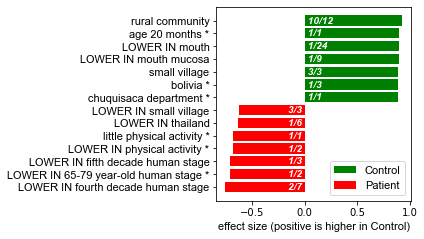

In [15]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [16]:
f.figure.savefig('./fig-terms-CFS.pdf')

2022-06-19 14:35:50 INFO found 2 annotations with the term ['little physical activity']
2022-06-19 14:35:50 INFO annotation 1726 is low
2022-06-19 14:35:50 INFO ignored 0 annotations


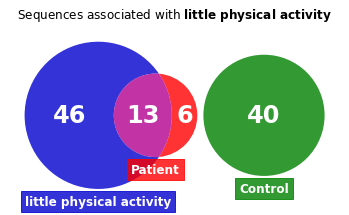

In [20]:
f=db.plot_term_venn_all('little physical activity',dd,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':24},max_id=7440)

In [21]:
f.savefig('./fig-venn-little-activity.pdf')

2022-06-19 14:35:51 INFO found 2 annotations with the term ['physical activity']
2022-06-19 14:35:51 INFO annotation 1725 is low
2022-06-19 14:35:51 INFO ignored 0 annotations


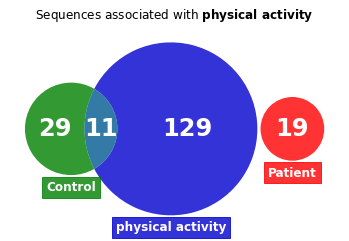

In [22]:
f=db.plot_term_venn_all('physical activity',dd,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold', 'fontsize':24},max_id=7440)

In [23]:
f.savefig('./fig-venn-activity.pdf')